# <center>基于JUPYTER的python主流库新手教程(下)</center>
** *** **
## <center>--------------------------可视化篇---------------------------</center>

## <center>作者：二马传奇</center>

**接着上次的内容下面继续介绍python其他主流库如Matplotlib，Seaborn等，这次的介绍将会偏向于可视化教程**

### 3. Matplotlib教程

#### 3.1 Matplotlib.Pyplot模块

In [1]:
import matplotlib.pyplot as plt

创建画布

创建子图

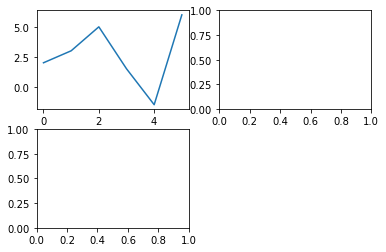

In [2]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax1.plot([2,3,5,1.5,-1.5,6])


通过subplots创建子图序列

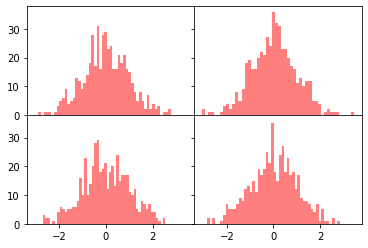

In [3]:
import numpy as np
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='r',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

绘制时利用Plt属性

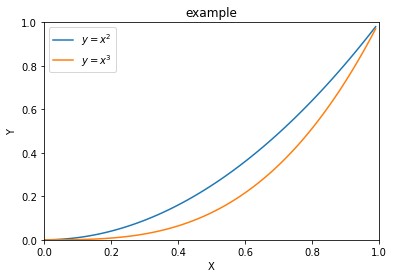

In [4]:
data=np.arange(0,1,0.01)
plt.title('example')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=10)
plt.plot(data,data**2)
plt.plot(data,data**3)
plt.legend(['$y=x^2$','$y=x^3$'])
plt.show()

设置Pyplot的动态rc参数

主要有线条宽度，线条样式，线条上点的形状，点的大小

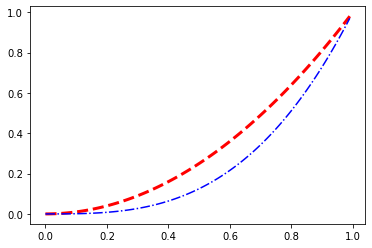

In [5]:
plt.plot(data,data**2,'r--',linewidth=3)
plt.plot(data,data**3,'b-.')
plt.show()

绘图的填充，这个应该是区别于matlab画图的一个重要的属性吧

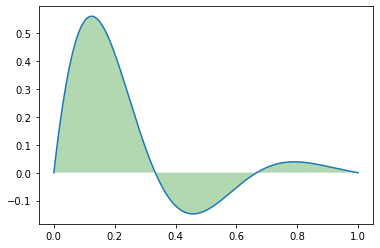

In [6]:
x=np.linspace(0,1,500)
y=np.sin(3*np.pi*x)*np.exp(-4*x)
fig,ax=plt.subplots()
plt.plot(x,y)
plt.fill_between(x,0,y,facecolor='green',alpha=0.3)
#x代表整个x轴均覆盖，0代表覆盖的下限，y代表覆盖的上限

也可以只填充部分区域

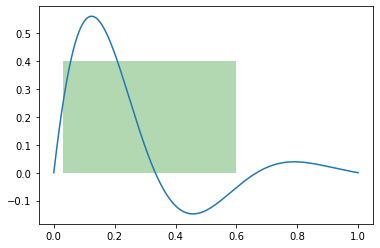

In [7]:
plt.plot(x,y)
plt.fill_between(x[15:300],0,0.4,facecolor='green',alpha=0.3)

两条曲线之间的填充

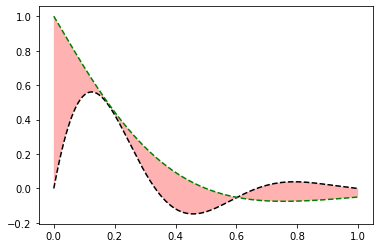

In [8]:
x=np.linspace(0,1,500)
y1=np.sin(3*np.pi*x)*np.exp(-4*x)
y2=np.cos(np.pi*x)*np.exp(-3*x)
plt.plot(x,y1,'k--')
plt.plot(x,y2,'g--')
plt.fill_between(x,y1,y2,facecolor="red",alpha=0.3)

#### 3.2 matplotlib常用绘图

折线图

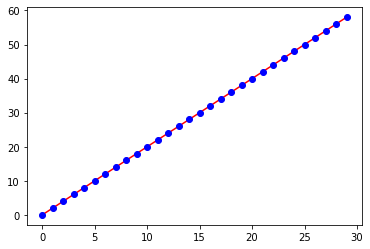

In [9]:
x1=np.arange(0,30)
plt.plot(x1,x1*2,'r')
plt.plot(x1,x1*2,'bo')
plt.show()

散点图

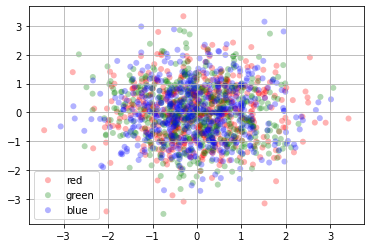

In [10]:
fig,ax=plt.subplots()
for color in ['red','green','blue']:
    n=500
    x,y=np.random.randn(2,n)
    ax.scatter(x,y,c=color,label=color,alpha=0.3,edgecolor='none')
ax.legend()
ax.grid(True)
plt.show()

直方图

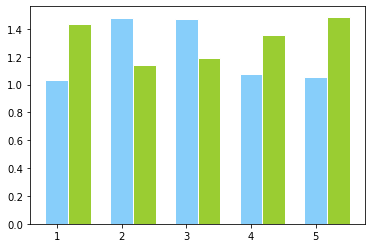

In [11]:
fig,ax=plt.subplots()
x=np.arange(1,6)
y1=np.random.uniform(1.5,1.0,5)
y2=np.random.uniform(1.5,1.0,5)
plt.bar(x,y1,width=0.35,facecolor='lightskyblue',edgecolor='white')
plt.bar(x+0.35,y2,width=0.35,facecolor='yellowgreen',edgecolor='white')
plt.show()


饼图

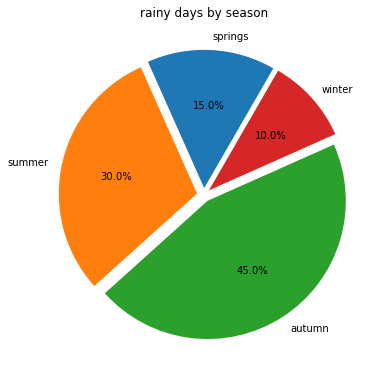

In [12]:
plt.figure(figsize=(6,6))
ax=plt.axes([0.1,0.1,0.8,0.8])
labels=['springs','summer','autumn','winter']
x=[15,30,45,10]
explode=(0.05,0.05,0.05,0.05)#用于控制分离距离，默认不分离
plt.pie(x,labels=labels,explode=explode,startangle=60,autopct='%1.1f%%')
plt.title('rainy days by season')
plt.tick_params(labelsize=12)
plt.show()

箱线图(用到pandas)

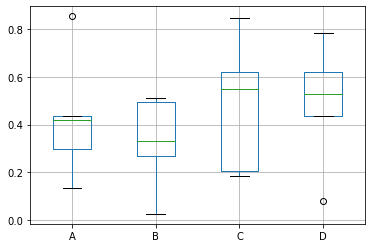

In [13]:
import pandas as pd
np.random.seed(2)
df=pd.DataFrame(np.random.rand(5,4),columns=list('ABCD'))
df.boxplot()
plt.show()

词云

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\tudad\AppData\Local\Temp\jieba.cache
Loading model cost 0.859 seconds.
Prefix dict has been built successfully.


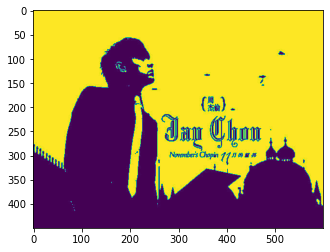

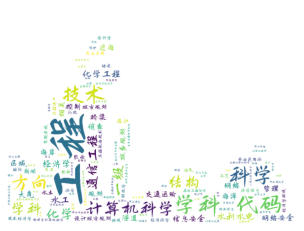

In [14]:
import jieba
import pandas as pd
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import numpy as np
from PIL import Image
def get_wordList():
    df=pd.read_excel('gwy.xls')
    wordList=df['专业要求'].tolist()
    return wordList
def get_wordCloud(mylist):
    word_list=[" ".join(jieba.cut(sentence)) for sentence in mylist]
    new_text=''.join(word_list)
    pic_path="jaychou.jpg"
    img_mask=np.array(Image.open(pic_path))
    wordcloud=WordCloud(background_color="white",max_words=200,max_font_size = 100,random_state=50,mask=img_mask,font_path=r"D:\jupter file\HongLeiBanShuJianTi\HongLeiBanShuJianTi-2.ttf",stopwords=STOPWORDS,).generate(new_text)
    iamge_colors = ImageColorGenerator(img_mask)
    plt.figure()
    plt.imshow(Image.open(pic_path))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordList=get_wordList()
get_wordCloud(wordList)

### 4. Seaborn教程

In [15]:
import seaborn as sns

通过set函数实现风格设置

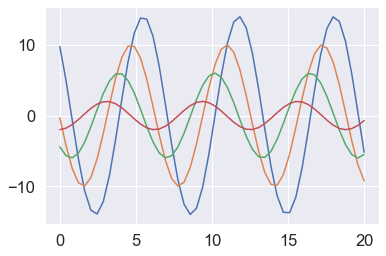

In [16]:
sns.set(style='darkgrid',font_scale=1.5)
def sinplot(flip=2):
    x=np.linspace(0,20,50)
    for i in range(1,5):
        plt.plot(x,np.cos(x+i*0.8)*(9-2*i)*flip)
sinplot()

移除轴线

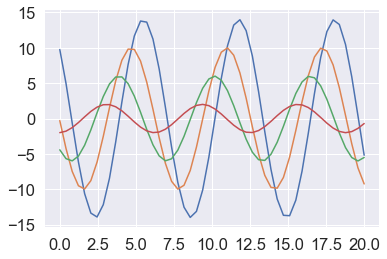

In [17]:
sinplot()
sns.set(style='darkgrid',palette='muted',color_codes=True)
sns.despine(left=True,bottom=True)

通过set_context()设置缩放参数，预设有paper,notebook,talk,poster,默认为notebook

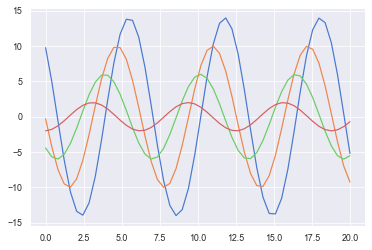

In [19]:
sns.set_context("paper")
sinplot()

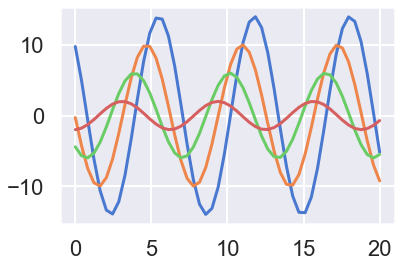

In [20]:
sns.set_context("poster")
sinplot()

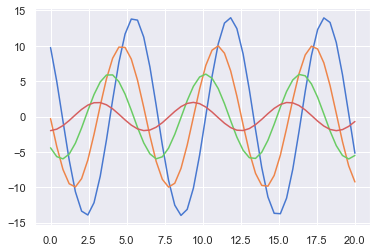

In [22]:
sns.set_context("notebook")
sinplot()

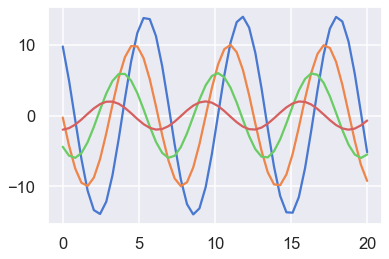

In [23]:
sns.set_context("talk")
sinplot()

#### 4.1 Seaborn常用绘图

直方图和密度曲线图

distplot为hist加强版，默认绘制一个直方图并嵌套一个对应的密度图

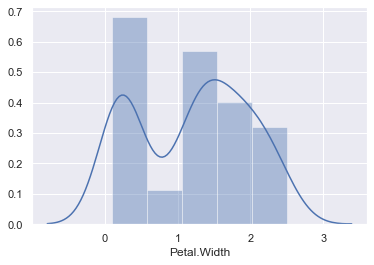

In [24]:
import pandas as pd
df_iris=pd.read_csv(r"D:\jupter file\数据分析与可视化例题源代码\ch3\data\iris.csv")
sns.set(color_codes=True)
sns.distplot(df_iris['Petal.Width'])

下面用displot分别绘制直方图和密度曲线图

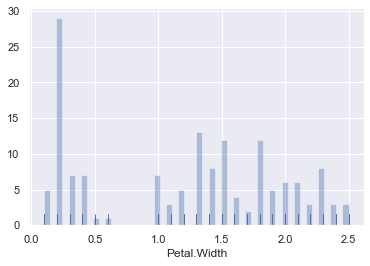

In [31]:
sns.distplot(df_iris['Petal.Width'],bins=50,kde=False,rug=True)

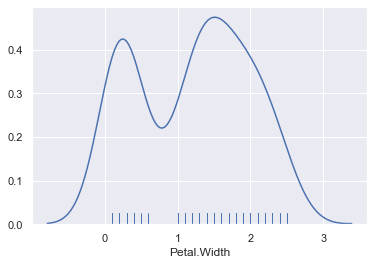

In [34]:
sns.distplot(df_iris['Petal.Width'],hist=False,rug=True)

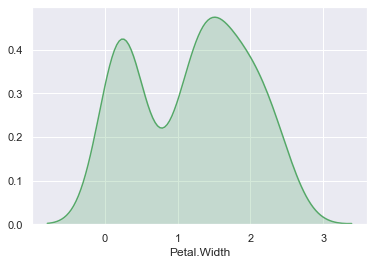

In [35]:
sns.distplot(df_iris['Petal.Width'],hist=False,color="g",kde_kws={"shade":True})

散点图，使用stripplot绘制变量在每个类别的值

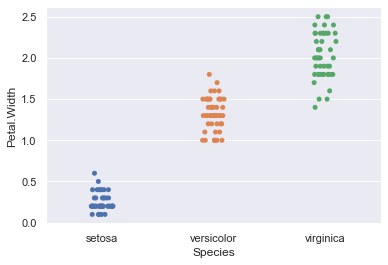

In [36]:
sns.set(style="darkgrid",color_codes=True)
sns.stripplot(x=df_iris['Species'],y=df_iris['Petal.Width'],data=df_iris)

这里介绍散点图经典处理方法，由于散点图中数据众多，很多点会因为差距较小而互相覆盖，这里可以加入抖动因子来使其稍微分散(水平)

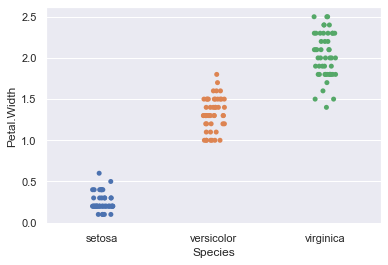

In [100]:
sns.set(style="darkgrid",color_codes=True)
sns.stripplot(x=df_iris['Species'],y=df_iris['Petal.Width'],data=df_iris,jitter=.1)

可以看出虽然加入了抖动因子，仍然还是有重合的点，如果想要看清所有的点，需要使用swarmplot函数

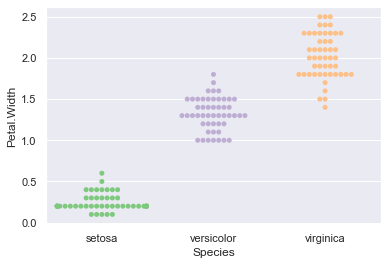

In [99]:
sns.swarmplot(x=df_iris["Species"],y=df_iris["Petal.Width"],data=df_iris)

箱线图

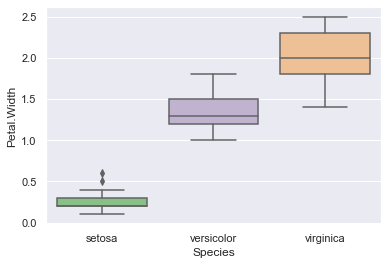

In [98]:
sns.boxplot(x=df_iris['Species'],y=df_iris['Petal.Width'])
plt.show()

散点图矩阵，使用pairplot方法实现数据特征的两两对比

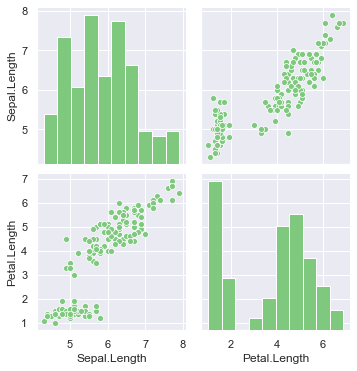

In [101]:
sns.set(palette="Accent")
sns.pairplot(df_iris,vars=['Sepal.Length','Petal.Length'])

小提琴图

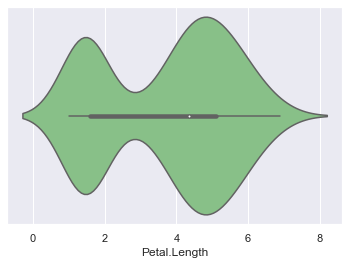

In [93]:
ax=sns.violinplot(x=df_iris['Petal.Length'])

柱状图


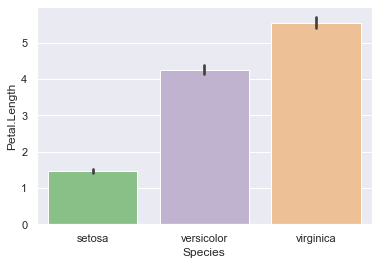

In [96]:
sns.barplot(x=df_iris['Species'],y=df_iris['Petal.Length'],data=df_iris)

计数柱状图

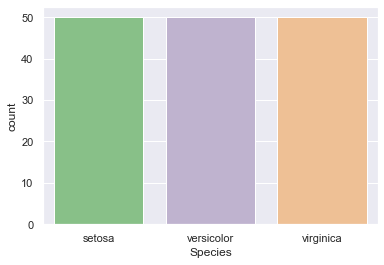

In [97]:
sns.countplot(x='Species',data=df_iris)

jointplot绘制两个变量的分布关系

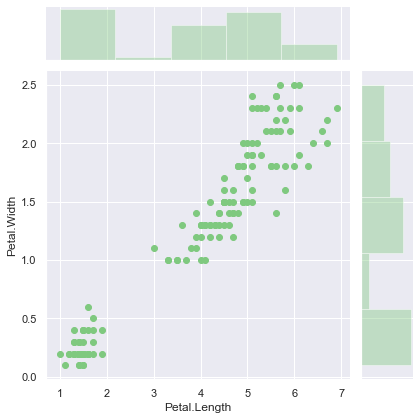

In [104]:
sns.set(palette="Accent")
sns.jointplot(x='Petal.Length',y='Petal.Width',data=df_iris)

使用Jointplot绘制等高线图(kind='kde')

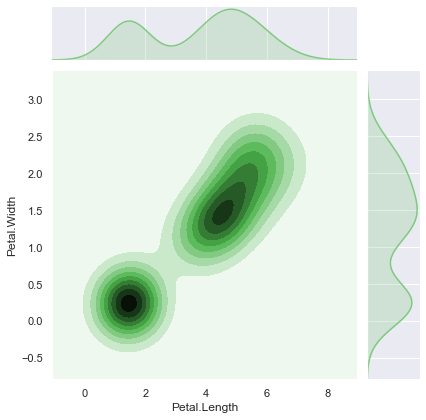

In [105]:
sns.jointplot(x='Petal.Length',y='Petal.Width',data=df_iris,kind='kde')

回归图

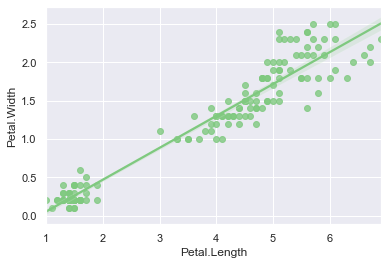

In [106]:
sns.regplot(x='Petal.Length',y='Petal.Width',data=df_iris)

### 5. pyecharts教程

柱状图

In [111]:
from pyecharts.charts import Bar
from pyecharts import options as opts

bar=(Bar().add_xaxis(["衬衫","毛衣","领带","裤子","风衣","高跟鞋","袜子"])
.add_yaxis("商家A",[114,55,27,101,125,27,105])
.set_global_opts(title_opts=opts.TitleOpts(title="某商场销售情况")))
bar.render_notebook()

并列柱状图

In [112]:
from pyecharts.charts import Bar
from pyecharts import options as opts

bar=(Bar().add_xaxis(["衬衫","毛衣","领带","裤子","风衣","高跟鞋","袜子"])
.add_yaxis("商家A",[114,55,27,101,125,27,105])
.add_yaxis("商家B",[57,134,137,129,145,60,49])
.set_global_opts(title_opts=opts.TitleOpts(title="某商场销售情况")))
bar.render_notebook()

oops!这效果有点炫酷还能在notebook格式下进行动态交互！
也能横着来

In [113]:
from pyecharts.charts import Bar
from pyecharts import options as opts

bar=(Bar().add_xaxis(["衬衫","毛衣","领带","裤子","风衣","高跟鞋","袜子"])
.add_yaxis("商家A",[114,55,27,101,125,27,105])
.add_yaxis("商家B",[57,134,137,129,145,60,49])
.set_global_opts(title_opts=opts.TitleOpts(title="某商场销售情况")))
bar.reversal_axis()
bar.render_notebook()

饼图

In [116]:
from pyecharts.charts import Pie
from pyecharts import options as opts
L1=["教授","副教授","讲师","助教","其他"]
num=[20,30,10,12,8]
c=(Pie().add("",[list(z)for z in zip(L1,num)])
.set_global_opts(title_opts=opts.TitleOpts(title="pie-职称类别比例"))
.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{c}")))
c.render_notebook()

绘制圆形饼图

In [119]:
from pyecharts.charts import Pie
from pyecharts import options as opts
L1=["教授","副教授","讲师","助教","其他"]
num=[20,30,10,12,8]
c=(Pie().add("",[list(z)for z in zip(L1,num)],radius=["40%","75%"])
.set_global_opts(title_opts=opts.TitleOpts(title="pie-Radius"),legend_opts=opts.LegendOpts(orient="vertical",pos_top="5%",pos_left="2%"))
.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{c}")))
c.render_notebook()

绘制玫瑰图

In [120]:
from pyecharts.charts import Pie
from pyecharts import options as opts
L1=["教授","副教授","讲师","助教","其他"]
num=[20,30,10,12,8]
c=(Pie().add("",[list(z)for z in zip(L1,num)],radius=["40%","55%"],center=[240,220],rosetype='radius')
.add("",[list(z)for z in zip(L1,num)],radius=["40%","55%"],center=[620,220],rosetype='area')
.set_global_opts(title_opts=opts.TitleOpts(title="pie-Radius"),legend_opts=opts.LegendOpts(orient="vertical",pos_top="5%",pos_left="2%"))
.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{c}")))
c.render_notebook()

漏斗图

In [122]:
from pyecharts.charts import Funnel
data=[45,86,39,52,68]
labels=["计算机","手机","电视机","冰箱","洗衣机"]
wf=Funnel()
wf.add("电器销量图",[list(z)for z in zip(labels,data)],is_selected=True)
wf.render_notebook()

仪表盘图

In [128]:
from pyecharts import options as opts
from pyecharts.charts import Gauge,Page
c=Gauge()
c.add("业务指标",[("完成率",55.5)],axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color=[(0.3,"#67e0e3"),(0.7,"#37a2da"),(1,"#fd666d")],width=30)))
c.set_global_opts(title_opts=opts.TitleOpts(title="Gauge-不同颜色"),legend_opts=opts.LegendOpts(is_show=False))
c.render_notebook()

### 6. 结语

**至此，我已经介绍完了python可视化中可能用到的大部分库，这些库绘图的风格各有不同，但是代码调用的繁琐程度也不相同，具体的应用和掌握还是以实际需要为导向，在日常的科研写作或是工作中，这些图形已经能够满足绝大部分的需求，而且相当"owesome",希望大家能够熟练掌握他们！**